In [1]:
# Import libraries
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

import torch
from torch import nn, optim

from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T

from random import shuffle

In [2]:
# Data path
data_path = "data/train"

In [3]:
# Dataset classes
os.listdir(data_path)

['cbsd', 'cbb', 'cmd', 'cgm', 'healthy']

In [5]:
# Label imbalance
data_paths = [
    (p, os.path.join(data_path, p))
    for p in os.listdir(data_path)
]

In [6]:
data_paths

[('cbsd', 'Dataset/train/cbsd'),
 ('cbb', 'Dataset/train/cbb'),
 ('cmd', 'Dataset/train/cmd'),
 ('cgm', 'Dataset/train/cgm'),
 ('healthy', 'Dataset/train/healthy')]

In [7]:
# Class distrtibution
count_dict = {
    a: len(os.listdir(b))
    for a, b in data_paths
}

In [8]:
count_dict

{'cbsd': 1443, 'cbb': 466, 'cmd': 2658, 'cgm': 773, 'healthy': 316}

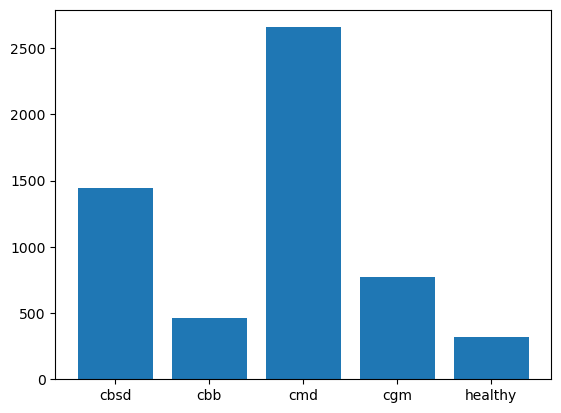

In [10]:
plt.bar(x = count_dict.keys(), height = count_dict.values())
plt.show(); plt.close("all")

In [11]:
sample_dir = data_paths[0]

In [12]:
sample_dir

('cbsd', 'Dataset/train/cbsd')

In [13]:
sample_paths = [
    os.path.join(sample_dir[-1], f)
    for f in os.listdir(sample_dir[-1])
]

In [14]:
sample_paths

['Dataset/train/cbsd/train-cbsd-215.jpg',
 'Dataset/train/cbsd/train-cbsd-568.jpg',
 'Dataset/train/cbsd/train-cbsd-30.jpg',
 'Dataset/train/cbsd/train-cbsd-90.jpg',
 'Dataset/train/cbsd/train-cbsd-841.jpg',
 'Dataset/train/cbsd/train-cbsd-140.jpg',
 'Dataset/train/cbsd/train-cbsd-408.jpg',
 'Dataset/train/cbsd/train-cbsd-901.jpg',
 'Dataset/train/cbsd/train-cbsd-779.jpg',
 'Dataset/train/cbsd/train-cbsd-988.jpg',
 'Dataset/train/cbsd/train-cbsd-819.jpg',
 'Dataset/train/cbsd/train-cbsd-756.jpg',
 'Dataset/train/cbsd/train-cbsd-1010.jpg',
 'Dataset/train/cbsd/train-cbsd-1255.jpg',
 'Dataset/train/cbsd/train-cbsd-81.jpg',
 'Dataset/train/cbsd/train-cbsd-1141.jpg',
 'Dataset/train/cbsd/train-cbsd-259.jpg',
 'Dataset/train/cbsd/train-cbsd-1052.jpg',
 'Dataset/train/cbsd/train-cbsd-1341.jpg',
 'Dataset/train/cbsd/train-cbsd-848.jpg',
 'Dataset/train/cbsd/train-cbsd-336.jpg',
 'Dataset/train/cbsd/train-cbsd-419.jpg',
 'Dataset/train/cbsd/train-cbsd-1102.jpg',
 'Dataset/train/cbsd/train-cbsd

In [17]:
image_sizes = []

for img in sample_paths:
    img = Image.open(img)
    img = np.array(img)

    image_sizes.append(img.shape)

In [18]:
set(image_sizes)

{(500, 434, 3),
 (500, 499, 3),
 (500, 500, 3),
 (500, 501, 3),
 (500, 502, 3),
 (500, 507, 3),
 (500, 509, 3),
 (500, 510, 3),
 (500, 512, 3),
 (500, 517, 3),
 (500, 518, 3),
 (500, 521, 3),
 (500, 523, 3),
 (500, 524, 3),
 (500, 530, 3),
 (500, 534, 3),
 (500, 539, 3),
 (500, 540, 3),
 (500, 544, 3),
 (500, 548, 3),
 (500, 549, 3),
 (500, 551, 3),
 (500, 553, 3),
 (500, 554, 3),
 (500, 555, 3),
 (500, 559, 3),
 (500, 561, 3),
 (500, 563, 3),
 (500, 564, 3),
 (500, 565, 3),
 (500, 568, 3),
 (500, 569, 3),
 (500, 570, 3),
 (500, 572, 3),
 (500, 574, 3),
 (500, 575, 3),
 (500, 578, 3),
 (500, 579, 3),
 (500, 580, 3),
 (500, 585, 3),
 (500, 587, 3),
 (500, 588, 3),
 (500, 591, 3),
 (500, 592, 3),
 (500, 594, 3),
 (500, 595, 3),
 (500, 596, 3),
 (500, 601, 3),
 (500, 603, 3),
 (500, 607, 3),
 (500, 608, 3),
 (500, 609, 3),
 (500, 612, 3),
 (500, 613, 3),
 (500, 617, 3),
 (500, 618, 3),
 (500, 622, 3),
 (500, 624, 3),
 (500, 625, 3),
 (500, 626, 3),
 (500, 629, 3),
 (500, 630, 3),
 (500, 6

In [19]:
sample_files = [
    os.listdir(p[-1])[:4] for p in data_paths
]

In [20]:
sample_files

[['train-cbsd-215.jpg',
  'train-cbsd-568.jpg',
  'train-cbsd-30.jpg',
  'train-cbsd-90.jpg'],
 ['train-cbb-76.jpg',
  'train-cbb-408.jpg',
  'train-cbb-223.jpg',
  'train-cbb-80.jpg'],
 ['train-cmd-2407.jpg',
  'train-cmd-2062.jpg',
  'train-cmd-885.jpg',
  'train-cmd-375.jpg'],
 ['train-cgm-24.jpg',
  'train-cgm-634.jpg',
  'train-cgm-475.jpg',
  'train-cgm-443.jpg'],
 ['train-healthy-310.jpg',
  'train-healthy-212.jpg',
  'train-healthy-27.jpg',
  'train-healthy-148.jpg']]

In [27]:
samples = dict()

for class_list in sample_files:
    class_ = class_list[0].split("-")[1]
    base_dir = os.path.join(data_path, class_)
    class_list = [os.path.join(base_dir, f) for f in class_list]
    samples[class_] = class_list

In [28]:
samples

{'cbsd': ['Dataset/train/cbsd/train-cbsd-215.jpg',
  'Dataset/train/cbsd/train-cbsd-568.jpg',
  'Dataset/train/cbsd/train-cbsd-30.jpg',
  'Dataset/train/cbsd/train-cbsd-90.jpg'],
 'cbb': ['Dataset/train/cbb/train-cbb-76.jpg',
  'Dataset/train/cbb/train-cbb-408.jpg',
  'Dataset/train/cbb/train-cbb-223.jpg',
  'Dataset/train/cbb/train-cbb-80.jpg'],
 'cmd': ['Dataset/train/cmd/train-cmd-2407.jpg',
  'Dataset/train/cmd/train-cmd-2062.jpg',
  'Dataset/train/cmd/train-cmd-885.jpg',
  'Dataset/train/cmd/train-cmd-375.jpg'],
 'cgm': ['Dataset/train/cgm/train-cgm-24.jpg',
  'Dataset/train/cgm/train-cgm-634.jpg',
  'Dataset/train/cgm/train-cgm-475.jpg',
  'Dataset/train/cgm/train-cgm-443.jpg'],
 'healthy': ['Dataset/train/healthy/train-healthy-310.jpg',
  'Dataset/train/healthy/train-healthy-212.jpg',
  'Dataset/train/healthy/train-healthy-27.jpg',
  'Dataset/train/healthy/train-healthy-148.jpg']}

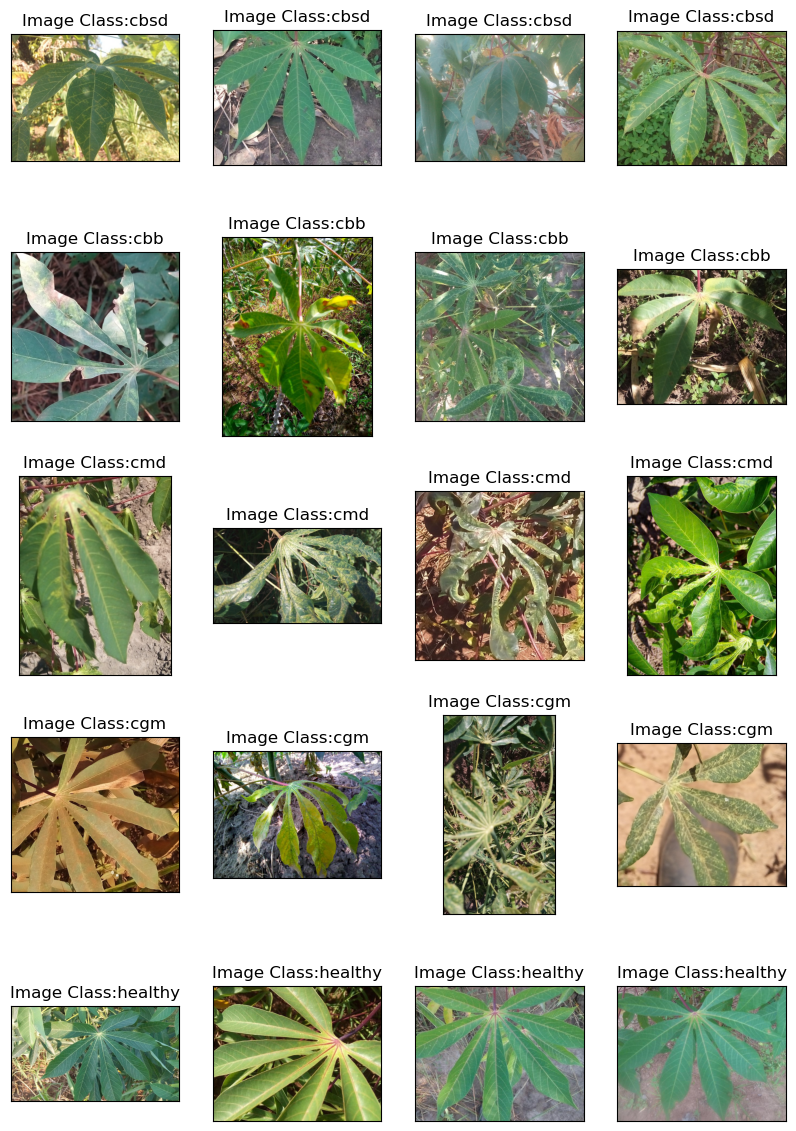

In [29]:
fig, axs = plt.subplots(len(samples), 4, figsize = (10, 15))

i = 0
j = 0

for class_, imgs in samples.items():
    for img in imgs:
        img = Image.open(img)

        axs[i, j].imshow(img)
        axs[i, j].set_title("Image Class:" + class_)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

        j += 1
    
    j = 0
    i += 1

plt.show(); plt.close("all")

---

Data Preparation Activities

1. __Image Resizing__: Due to the large, varying sizes of the images, a standardized size will be enforced.

2. __Pretrained Models__: To minimize learning-related computation, pretrained vision models will be leveraged.

In [32]:
# Select GPU or CPU
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [33]:
DEVICE

device(type='cuda')

In [36]:
class CassavaDataset(Dataset):
    def __init__(self, path, transform = None):
        self.path = path

        if transform is None:
            transform = T.Compose(
                [
                    T.Resize((224, 224)),
                    T.ToTensor(),
                    T.Normalize(mean = [.485, 0.456, .406], std = [.229, .224, .225])
                ]
                
            )

        self.transform = transform

        classes = os.listdir(path)
        self.class_map = dict(zip(classes, [_ for _ in range(len(classes))]))
        
        self.files = []

        for class_ in classes:
            class_files = os.listdir(os.path.join(path, class_))
            self.files += [
                (os.path.join(path, class_, f), class_) for f in class_files
            ]

        shuffle(self.files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):
        img, class_ = self.files[index]
        img = Image.open(img)

        return self.transform(img), self.class_map[class_]

In [37]:
# Instantiate dataset
dataset = CassavaDataset(path = data_path)

In [38]:
dataset.files

[('Dataset/train/healthy/train-healthy-314.jpg', 'healthy'),
 ('Dataset/train/cmd/train-cmd-857.jpg', 'cmd'),
 ('Dataset/train/cbb/train-cbb-360.jpg', 'cbb'),
 ('Dataset/train/cmd/train-cmd-1900.jpg', 'cmd'),
 ('Dataset/train/cmd/train-cmd-2293.jpg', 'cmd'),
 ('Dataset/train/cmd/train-cmd-2088.jpg', 'cmd'),
 ('Dataset/train/cgm/train-cgm-658.jpg', 'cgm'),
 ('Dataset/train/cmd/train-cmd-814.jpg', 'cmd'),
 ('Dataset/train/cbsd/train-cbsd-717.jpg', 'cbsd'),
 ('Dataset/train/cgm/train-cgm-87.jpg', 'cgm'),
 ('Dataset/train/cmd/train-cmd-1805.jpg', 'cmd'),
 ('Dataset/train/cgm/train-cgm-71.jpg', 'cgm'),
 ('Dataset/train/cbsd/train-cbsd-1342.jpg', 'cbsd'),
 ('Dataset/train/cmd/train-cmd-1785.jpg', 'cmd'),
 ('Dataset/train/cmd/train-cmd-365.jpg', 'cmd'),
 ('Dataset/train/cbsd/train-cbsd-873.jpg', 'cbsd'),
 ('Dataset/train/cbsd/train-cbsd-1084.jpg', 'cbsd'),
 ('Dataset/train/cbsd/train-cbsd-125.jpg', 'cbsd'),
 ('Dataset/train/cmd/train-cmd-2297.jpg', 'cmd'),
 ('Dataset/train/cbsd/train-cbsd-74.

In [39]:
len(dataset)

5656

In [40]:
# Split into trai and test sets
train_ds, test_ds = random_split(dataset = dataset, lengths = [.7, .3])

In [41]:
len(train_ds)

3960

In [42]:
len(test_ds)

1696

In [43]:
BATCH_SIZE = 16

In [45]:
# Generate DataLoaders
train_dl, test_dl = (
    DataLoader(dataset = train_ds, batch_size = BATCH_SIZE, shuffle = True),
    DataLoader(dataset = test_ds, batch_size = BATCH_SIZE, shuffle = True)
)

---

<div><h3>04. Data Modelling</h3></div>

High-level steps for _Data Modeling_:

1. Load pretrained model.

2. Reconfigure pretrained model.

    + Resnet-18
  
    + VGG-13
  
3. Initialize model weights.

4. Instantiate training utilities e.g., _optimizer_.

5. Write training loop.

6. Train model.

In [46]:
from torchvision.models import resnet18, vgg13
from sklearn.metrics import accuracy_score

In [47]:
def generate_model(out_features, freeze_weights = True, model_function = resnet18):
    base_model = model_function(weights = True)

    if freeze_weights:
        for param in base_model.parameters():
            param.requires_grad_(False)

    try:
        in_features = base_model.fc.in_features
        new_layer = nn.Linear(in_features = in_features, out_features = out_features)
        base_model.fc = new_layer
    except:
        in_features = base_model.classifier[0].in_features
        new_layer = nn.Linear(in_features = in_features, out_features = out_features)
        base_model.classifier = new_layer

    return base_model

In [48]:
class Model(nn.Module):
    def __init__(self, out_features, freeze_weights = True, model_function = resnet18):
        super().__init__()

        self.base = generate_model(
            out_features = out_features,
            freeze_weights = freeze_weights,
            model_function = model_function
        )

    def forward(self, x):
        x = self.base(x)
        return torch.log_softmax(x, dim = -1)

In [49]:
# Training hyuperparamewters
EPOCHS = 20
LR = 1e-3
criterion = nn.CrossEntropyLoss()

NUM_CLASSES = len(dataset.class_map) # Number of data categories

# Optimizer hyperparameters
FACTOR = 10
AMSGRAD = False
BETAS = (.9, .999)

In [50]:
def initialize_model_weights(model, init_func = nn.init.normal_):
    for name, parameter in model.named_parameters():
        if name in ["fc", "classifier"]:
            init_func(parameter)
        else:
            continue

    return model

In [57]:
def training_loop(epochs, model, optimizer):
    TRAIN_LOSSES, TEST_LOSSES = [], []
    TRAIN_ACCS, TEST_ACCS = [], []

    for epoch in range(1, epochs + 1):
        train_losses, test_losses = [], []
        train_accs, test_accs = [], []

        model.train() # Set up training mode

        for X, y in iter(train_dl):
            X, y = X.to(DEVICE), y.to(DEVICE)

            y_pred = model(X)

            train_loss = criterion(y_pred, y) # Compare actual targets and predicted targets to get the loss
            train_loss.backward() # Backpropagate the loss
            
            optimizer.step()
            optimizer.zero_grad()

            train_losses.append(train_loss.item())

            train_acc = accuracy_score(y.cpu().numpy(), y_pred.max(dim = -1).indices.cpu().numpy())
            train_accs.append(train_acc)

        with torch.no_grad(): # Turn off computational graph
            model.eval() # Set model to evaluation mode
            for X_, y_ in iter(test_dl):
                X_, y_ = X_.to(DEVICE), y_.to(DEVICE)
    
                y_pred_ = model(X_)
    
                test_loss = criterion(y_pred_, y_) # Compare actual targets and predicted targets to get the loss
                test_losses.append(test_loss.item())

                test_acc = accuracy_score(y_.cpu().numpy(), y_pred_.max(dim = -1).indices.cpu().numpy())
                test_accs.append(test_acc)

        avg_train_loss = sum(train_losses) / len(train_losses)
        avg_test_loss = sum(test_losses) / len(test_losses)

        avg_train_acc = sum(train_accs) / len(train_accs)
        avg_test_acc = sum(test_accs) / len(test_accs)

        print(
            f"Epoch: {epoch} | Train loss: {avg_train_loss: .3f} | Test loss: {avg_test_loss: .3f} |",
            f"Train accuracy: {avg_train_acc: .3f} | Test accuracy: {avg_test_acc: .3f} |"
        )

        TRAIN_LOSSES.append(avg_train_loss)
        TEST_LOSSES.append(avg_test_loss)

        TRAIN_ACCS.append(avg_train_acc)
        TEST_ACCS.append(avg_test_acc)

    # Clear CUDA cache
    torch.cuda.empty_cache()
    torch.clear_autocast_cache()

    return {
        "loss": [TRAIN_LOSSES, TEST_LOSSES],
        "accuracy": [TRAIN_ACCS, TEST_ACCS],
        "model": model
    }

#### VGG-13
1. Finetuning
2. Frozen weights

In [59]:
# VGG-13 with weight finetuning
vgg_model = Model(out_features = NUM_CLASSES, freeze_weights = False, model_function = vgg13).to(DEVICE)

In [60]:
# Initialize model weights
vgg_model = initialize_model_weights(vgg_model)

In [61]:
# Adam optimizer
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas = BETAS
)

In [62]:
# Train VGG-13 with finetuning
vgg_finetuned = training_loop(epochs = EPOCHS, optimizer = opt, model = vgg_model)

Epoch: 1 | Train loss:  1.267 | Test loss:  1.368 | Train accuracy:  0.669 | Test accuracy:  0.690 |
Epoch: 2 | Train loss:  0.205 | Test loss:  1.248 | Train accuracy:  0.941 | Test accuracy:  0.712 |
Epoch: 3 | Train loss:  0.093 | Test loss:  1.395 | Train accuracy:  0.985 | Test accuracy:  0.716 |
Epoch: 4 | Train loss:  0.129 | Test loss:  1.363 | Train accuracy:  0.991 | Test accuracy:  0.731 |
Epoch: 5 | Train loss:  0.098 | Test loss:  1.549 | Train accuracy:  0.995 | Test accuracy:  0.710 |
Epoch: 6 | Train loss:  0.113 | Test loss:  1.857 | Train accuracy:  0.993 | Test accuracy:  0.700 |
Epoch: 7 | Train loss:  0.089 | Test loss:  1.504 | Train accuracy:  0.995 | Test accuracy:  0.731 |
Epoch: 8 | Train loss:  0.087 | Test loss:  1.504 | Train accuracy:  0.995 | Test accuracy:  0.733 |
Epoch: 9 | Train loss:  0.088 | Test loss:  1.750 | Train accuracy:  0.994 | Test accuracy:  0.710 |
Epoch: 10 | Train loss:  0.106 | Test loss:  1.685 | Train accuracy:  0.995 | Test accuracy

### VGG-13 with frozen weights

In [63]:
# VGG-13 with weights frozen
vgg_model = Model(out_features = NUM_CLASSES, freeze_weights = True, model_function = vgg13).to(DEVICE)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
# Initialize model weights
vgg_model = initialize_model_weights(vgg_model)

In [65]:
# Adam optimizer
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas = BETAS
)

In [66]:
# Train VGG-13 with frozen weights
vgg_frozen = training_loop(epochs = EPOCHS, optimizer = opt, model = vgg_model)

Epoch: 1 | Train loss:  1.233 | Test loss:  1.474 | Train accuracy:  0.664 | Test accuracy:  0.660 |
Epoch: 2 | Train loss:  0.212 | Test loss:  1.201 | Train accuracy:  0.939 | Test accuracy:  0.731 |
Epoch: 3 | Train loss:  0.101 | Test loss:  1.375 | Train accuracy:  0.985 | Test accuracy:  0.716 |
Epoch: 4 | Train loss:  0.082 | Test loss:  1.404 | Train accuracy:  0.991 | Test accuracy:  0.723 |
Epoch: 5 | Train loss:  0.077 | Test loss:  1.359 | Train accuracy:  0.996 | Test accuracy:  0.731 |
Epoch: 6 | Train loss:  0.120 | Test loss:  1.500 | Train accuracy:  0.995 | Test accuracy:  0.725 |
Epoch: 7 | Train loss:  0.120 | Test loss:  1.585 | Train accuracy:  0.995 | Test accuracy:  0.718 |
Epoch: 8 | Train loss:  0.102 | Test loss:  1.546 | Train accuracy:  0.995 | Test accuracy:  0.728 |
Epoch: 9 | Train loss:  0.132 | Test loss:  1.753 | Train accuracy:  0.987 | Test accuracy:  0.715 |
Epoch: 10 | Train loss:  0.138 | Test loss:  2.213 | Train accuracy:  0.981 | Test accuracy

#### Renset-18
1. Finetuning
2. Frozen weights

In [67]:
# Resnet-18 with weight finetuning
resnet_model = Model(out_features = NUM_CLASSES, freeze_weights = False, model_function = resnet18).to(DEVICE)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [68]:
# Initialize model weights
resnet_model = initialize_model_weights(resnet_model)

In [69]:
# Adam optimizer
opt = optim.Adam(
    params = [
        {
            "params": resnet_model.base.fc.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas = BETAS
)

In [70]:
# Train Resnet-18 with finetuning
resnet_finetuned = training_loop(epochs = EPOCHS, optimizer = opt, model = resnet_model)

Epoch: 1 | Train loss:  1.037 | Test loss:  0.874 | Train accuracy:  0.612 | Test accuracy:  0.679 |
Epoch: 2 | Train loss:  0.831 | Test loss:  0.832 | Train accuracy:  0.698 | Test accuracy:  0.669 |
Epoch: 3 | Train loss:  0.763 | Test loss:  0.782 | Train accuracy:  0.723 | Test accuracy:  0.706 |
Epoch: 4 | Train loss:  0.742 | Test loss:  0.759 | Train accuracy:  0.730 | Test accuracy:  0.710 |
Epoch: 5 | Train loss:  0.709 | Test loss:  0.768 | Train accuracy:  0.745 | Test accuracy:  0.696 |
Epoch: 6 | Train loss:  0.716 | Test loss:  0.773 | Train accuracy:  0.737 | Test accuracy:  0.718 |
Epoch: 7 | Train loss:  0.724 | Test loss:  0.796 | Train accuracy:  0.734 | Test accuracy:  0.699 |
Epoch: 8 | Train loss:  0.689 | Test loss:  0.777 | Train accuracy:  0.748 | Test accuracy:  0.695 |
Epoch: 9 | Train loss:  0.693 | Test loss:  0.783 | Train accuracy:  0.748 | Test accuracy:  0.701 |
Epoch: 10 | Train loss:  0.682 | Test loss:  0.750 | Train accuracy:  0.758 | Test accuracy

### Resnet-18 with frozen weights

In [71]:
# Resnet-18 with weights frozen
resnet_model = Model(out_features = NUM_CLASSES, freeze_weights = True, model_function = resnet18).to(DEVICE)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [72]:
# Initialize model weights
resnet_model = initialize_model_weights(resnet_model)

In [73]:
# Adam optimizer
opt = optim.Adam(
    params = [
        {
            "params": resnet_model.base.fc.parameters(),
            "lr": LR
        }
    ],
    lr = LR/FACTOR,
    amsgrad = AMSGRAD,
    betas = BETAS
)

In [74]:
# Train Resnet-18 with frozen weights
resnet_frozen = training_loop(epochs = EPOCHS, optimizer = opt, model = resnet_model)

Epoch: 1 | Train loss:  1.027 | Test loss:  0.846 | Train accuracy:  0.613 | Test accuracy:  0.683 |
Epoch: 2 | Train loss:  0.834 | Test loss:  0.810 | Train accuracy:  0.691 | Test accuracy:  0.690 |
Epoch: 3 | Train loss:  0.780 | Test loss:  0.853 | Train accuracy:  0.714 | Test accuracy:  0.682 |
Epoch: 4 | Train loss:  0.738 | Test loss:  0.755 | Train accuracy:  0.740 | Test accuracy:  0.716 |
Epoch: 5 | Train loss:  0.724 | Test loss:  0.786 | Train accuracy:  0.736 | Test accuracy:  0.700 |
Epoch: 6 | Train loss:  0.711 | Test loss:  0.752 | Train accuracy:  0.736 | Test accuracy:  0.707 |
Epoch: 7 | Train loss:  0.698 | Test loss:  0.739 | Train accuracy:  0.748 | Test accuracy:  0.719 |
Epoch: 8 | Train loss:  0.702 | Test loss:  0.767 | Train accuracy:  0.739 | Test accuracy:  0.709 |
Epoch: 9 | Train loss:  0.680 | Test loss:  0.747 | Train accuracy:  0.747 | Test accuracy:  0.715 |
Epoch: 10 | Train loss:  0.670 | Test loss:  0.802 | Train accuracy:  0.753 | Test accuracy

---

<div><h3>05. Model Evaluation</h3></div>

In [75]:
def visualize_results(history, key = None):
    if key is not None:
        TRAIN_RESULTS, TEST_RESULTS = history[key]

        plt.figure(figsize = (10, 3))

        plt.plot(range(EPOCHS), TRAIN_RESULTS, label = f"Training {key.capitalize()}")
        plt.plot(range(EPOCHS), TEST_RESULTS, label = f"Test {key.capitalize()}")

        plt.xlabel("Epochs")
        plt.ylabel(key.capitalize())

        plt.title(key.capitalize() + " Evolution for Train and Test Splits", fontsize = 16)

        plt.legend()
        plt.show(); plt.close("all")
    else:
        TRAIN_LOSSES, TEST_LOSSES = history["loss"]
        TRAIN_ACCS, TEST_ACCS = history["accuracy"]

        fig, ax = plt.subplots(1, 2, figsize = (15, 4))

        ax[0].plot(range(EPOCHS), TRAIN_LOSSES, label = "Training Loss")
        ax[0].plot(range(EPOCHS), TEST_LOSSES, label = "Test Loss")

        ax[0].set_xlabel("Epochs")
        ax[0].set_ylabel("Loss")

        ax[0].set_title("Loss Evolution for Train and Test Splits", fontsize = 16)

        ax[1].plot(range(EPOCHS), TRAIN_ACCS, label = "Training Accuracy")
        ax[1].plot(range(EPOCHS), TEST_ACCS, label = "Test Accuracy")

        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Accuracy")

        ax[1].set_title("Accuracy Evolution for Train and Test Splits", fontsize = 16)

        plt.legend()
        plt.show(); plt.close("all")

    return

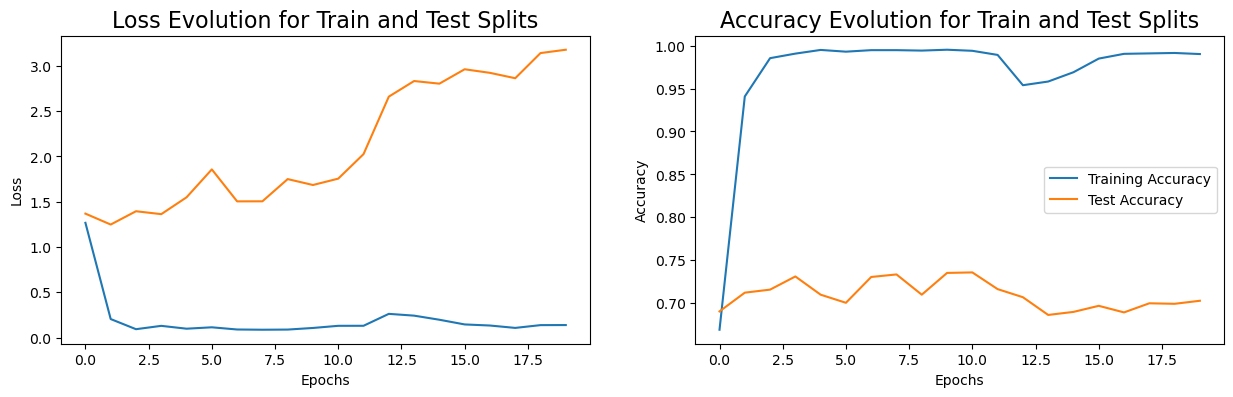

In [76]:
# VGG-13 with finetuning
visualize_results(vgg_finetuned)

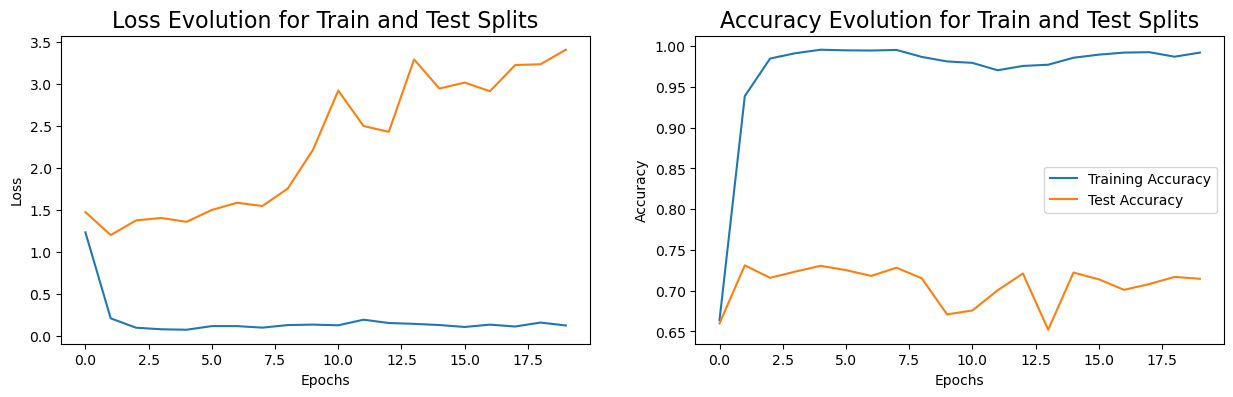

In [77]:
# VGG-13 with weights frozen
visualize_results(vgg_frozen)

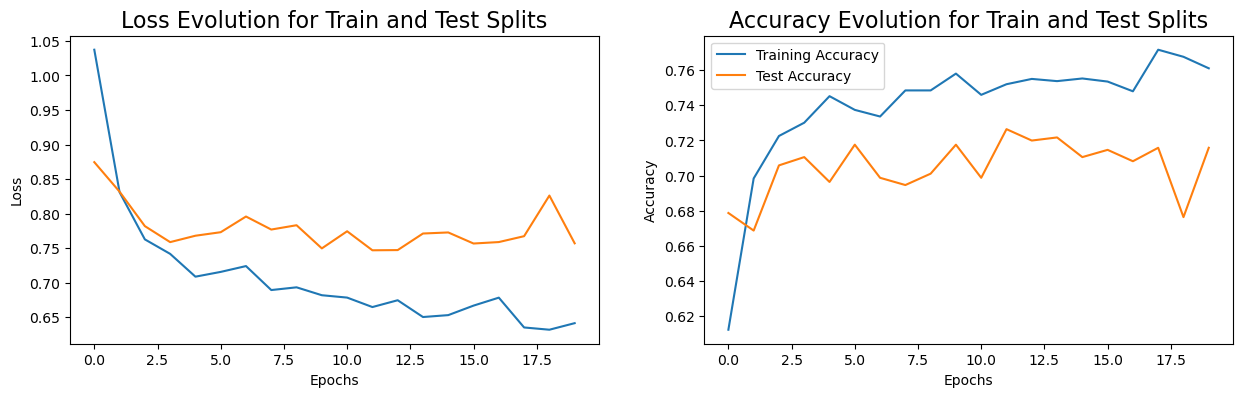

In [78]:
# Resnet-18 with finetuning
visualize_results(resnet_finetuned)

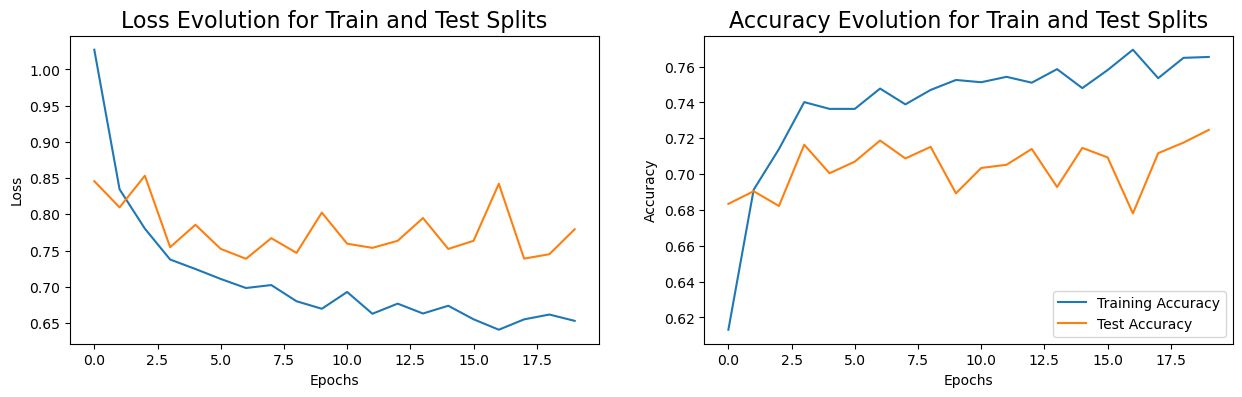

In [79]:
# Resnet-18 with weights frozen
visualize_results(resnet_frozen)

#### Observation

In order to combat label imbalance, pretrained models were leveraged. These models were utilized both as feature extractors and as finetuned blocks. The results observed were as follows:

1. No serious difference in performance was observed when using the pretrained __Resnet-18__ model as feature extractor (with frozen weights) or as a finetuned block.

2. The pretrained __VGG-13__ model was prone to overfitting, but showed better performance when finetuned compared to when the weights were frozen.

3. The __Resnet-18__ models showed slightly better performance when finetuned compared to when the weights were frozen.

4. The __VGG-13__ models generally surpassed the __Resnet-18__ models in magnitude, but __Resnet-18__ is better with respect to generalization error.

5. The image sizes had considerable impact on model speed and performance. Training with a size of _600 x 600_ gave a slower, lesser-performing model than with a size of _224 x 224_ (Behind-the-scenes experimentation).

6. The __VGG-13__ model is more prone to overfitting in general, compared to the __Resnet-18__ model. This might be due to the size difference between __VGG-13__ (\~500 MB) and __Resnet__ (\~90 MB).

---

#### Simple Model Engineering

In [83]:
!mkdir artefacts
!mkdir artefacts/models

In [84]:
selected_model = resnet_finetuned["model"]

In [85]:
for param in selected_model.parameters():
    param.requires_grad_(False)

In [86]:
scripted_model = torch.jit.script(selected_model)

scripted_model.save("./artefacts/models/scripted_model.pt")

In [88]:
dummy_input = torch.randn(1, 3, 224, 224).to(DEVICE) # BATCH_SIZE, NUM_CHANNELS, IMG_HEIGHT, IMG_WIDTH
traced_model = torch.jit.trace(selected_model, dummy_input)

traced_model.save("./artefacts/models/traced_model.pt")